In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [141]:
df = pd.read_csv('actuals_operating_datasd.csv')
df.head()

,amount,report_fy,fund_type,fund_number,dept_name,funds_center_number,account,account_number
0,349193.50,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Salaried Wages,500011
1,23875.99,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation,500014
2,7449.95,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Sick Leave/Vacation Accrual,500015
3,2942.31,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,A/L Bereavement Pay,500016
4,1532.45,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation Pay In Lieu,500017


In [142]:
df['account'].unique()

array(['Salaried Wages', 'Vacation', 'Sick Leave/Vacation Accrual', ...,
       'Approved Administrative Leave', 'Natural Gas-Motor Fuel',
       'CADD Certification'], dtype=object)

In [156]:
diction2 = pd.read_csv('operating_actuals_dictionary_datasd.csv')
diction2.iloc[6]#['description']

field                                                 account_number
description        Uniquely identifies an expense or revenue acco...
possible_values                                                  NaN
Name: 6, dtype: object

In [144]:
df2 = gpd.read_file('parks_datasd.geojson')
df2.head()

,objectid,name,alias,gis_acres,park_type,location,owner,geometry
0,1,South Carlsbad SB,South Carlsbad State Beach,115.895878,State,,State Parks,"MULTIPOLYGON (((-117.31431 33.09015, -117.3142..."
1,2,Torrey Pines SB,Torrey Pines State Beach,67.294309,State,,State Parks,"POLYGON ((-117.26147 32.93883, -117.26181 32.9..."
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,"POLYGON ((-117.17298 32.71167, -117.17303 32.7..."
3,4,Tuna Harbor Park,Tuna Harbor Park,0.639035,Local,"700 North Harbor Dr, San Diego. California",SDUPD,"POLYGON ((-117.17260 32.71160, -117.17268 32.7..."
4,5,San Diego Bayfront Park,San Diego Bayfront Park,3.669272,Local,"One Park Boulevard, San Diego. California",SDUPD,"MULTIPOLYGON (((-117.16074 32.70407, -117.1594..."


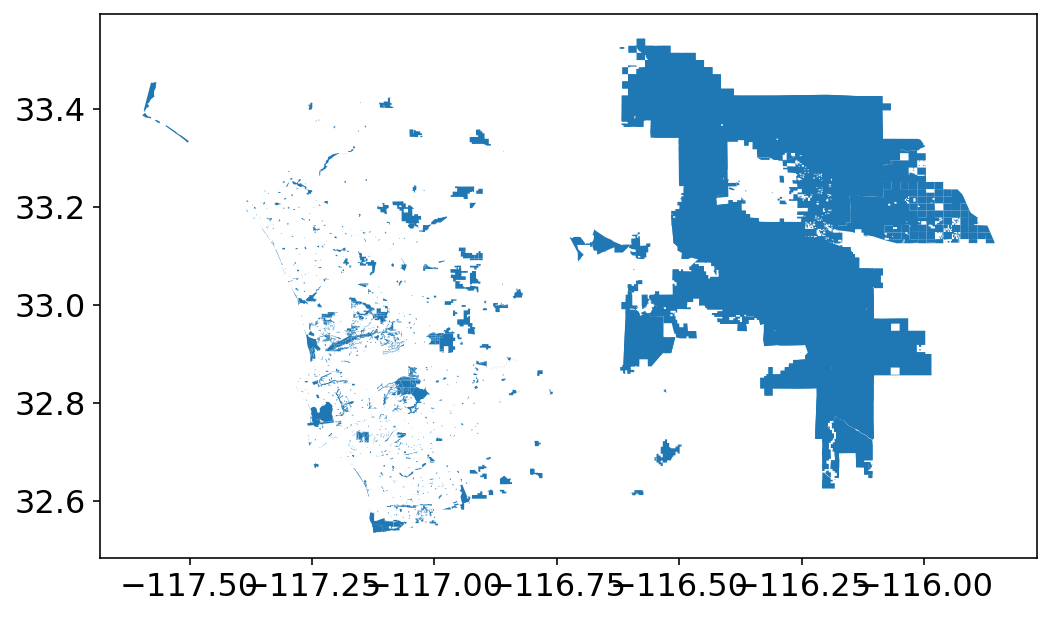

In [145]:
base = df2.plot()

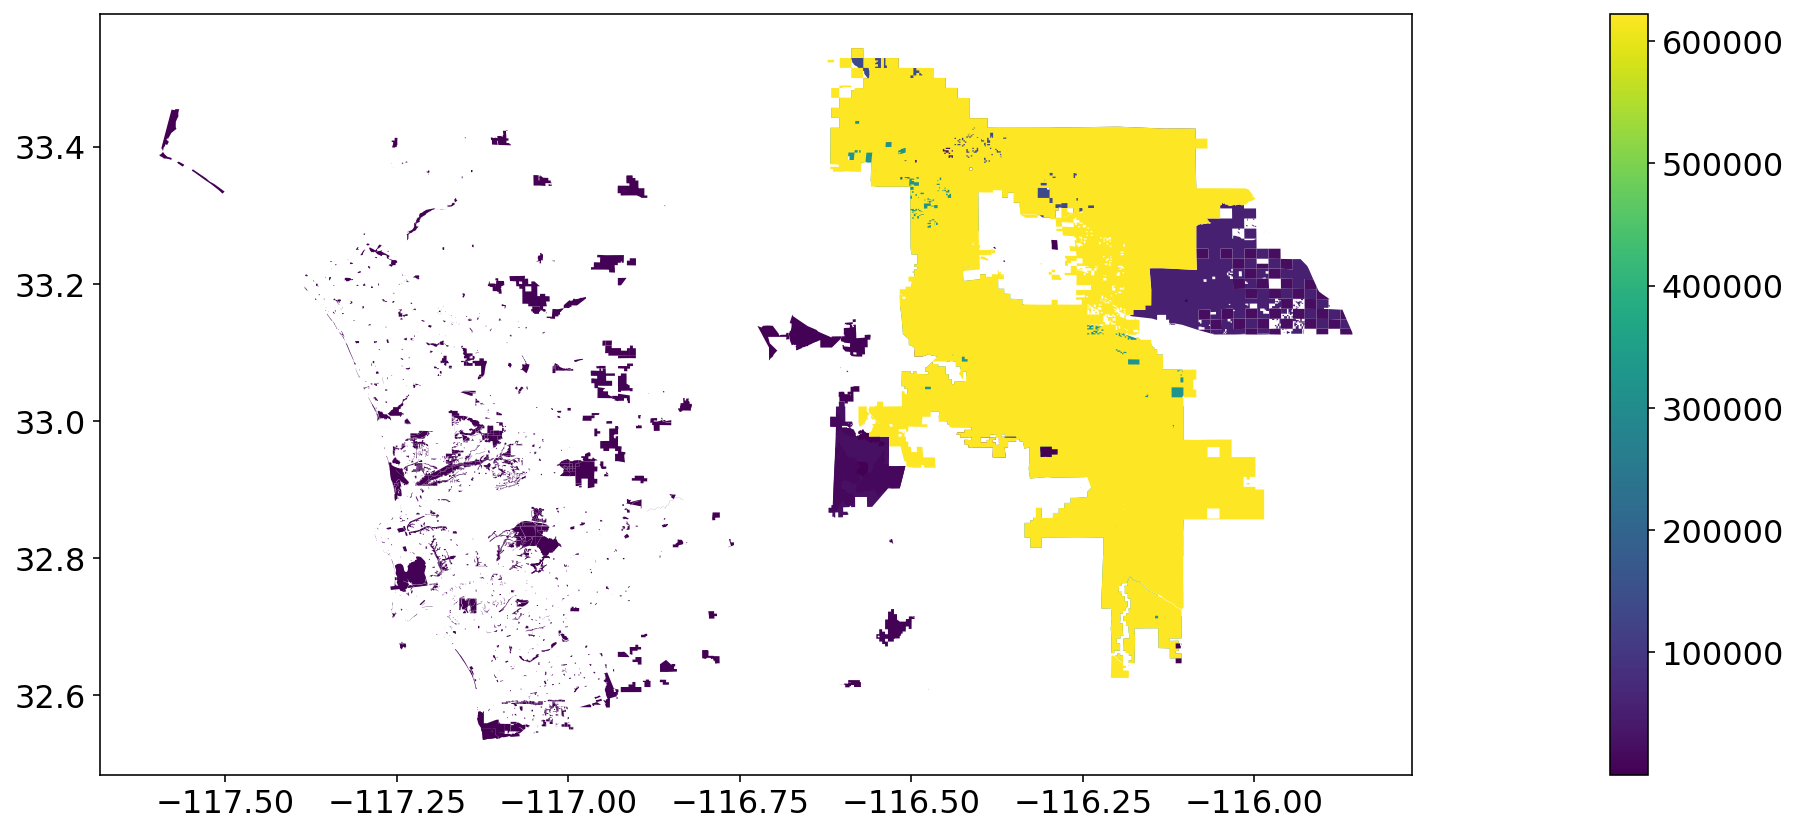

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
df2.plot(column='gis_acres', ax=ax, legend=True);

In [279]:
df4 = gpd.read_file('joint_use_datasd.geojson')#['playg_inst']
df4.head()

,objectid,name,facility,school_dis,city_acres,dist_acres,enhanced,strt_date,term_yrs,exp_date,...,baseb_90,softball,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st,geometry
0,2087,Adams Elementary,Adams Avenue Community Park,San Diego Unified,1.12,1.38,N,1990-07-23,25,2015-07-23T00:00:00,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.11740 32.76309, -117.11824 32.7..."
1,2088,Alcott Elementary,Alcott Elementary,San Diego Unified,0.00,6.11,N,2006-09-19,25,2031-09-19T00:00:00,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.22107 32.83165, -117.22061 32.8..."
2,2089,Bayview Terrace Elementary,Bayview Terrace Elementary,San Diego Unified,0.00,3.50,N,2000-10-16,25,2025-10-10T00:00:00,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.22259 32.80191, -117.2226..."
3,2090,Bird Rock Elementary,Bird Rock Neighborhood Park,San Diego Unified,0.70,1.09,Y,2005-05-03,25,2030-05-03T00:00:00,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.26283 32.81082, -117.2626..."
4,2091,Black Mountain Middle School,Black Mountain Middle,San Diego Unified,0.00,1.60,N,1990-06-11,50,2040-05-29T00:00:00,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-117.12547 32.96962, -117.12537 32.9..."


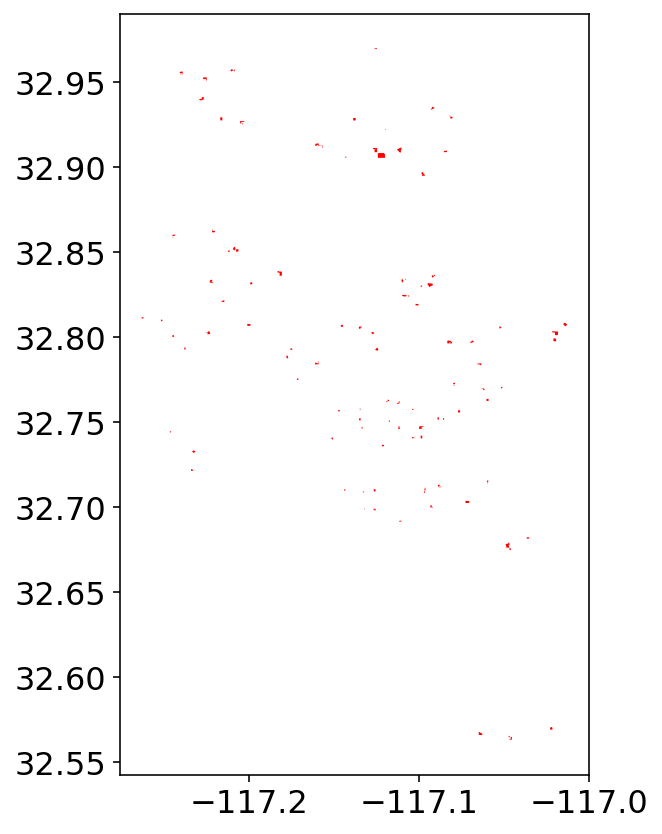

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
df4.plot(ax=ax,color='red', markersize=5)

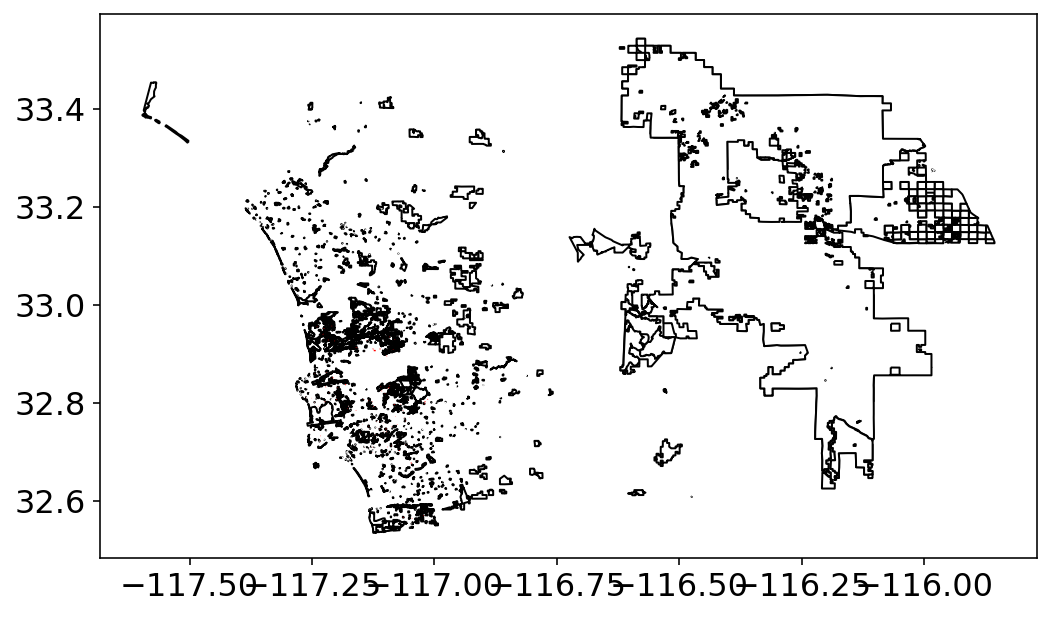

In [136]:
# combining maps
fig, ax = plt.subplots()
ax.set_aspect('equal')
base = df2.plot(ax=ax,color='white', edgecolor='black')
df4.plot(ax=base,color='red', markersize=5)

In [79]:
diction = pd.read_csv('joint_use_dictionary_datasd.csv') #community, notes,council_di

In [108]:
diction.iloc[26]

field              comfort_st
field_type            Integar
description               NaN
possible_values           NaN
Name: 26, dtype: object

In [158]:
diction3 = pd.read_excel('hciaccesstoparks-data-dictionary.xlsx')

In [209]:
diction3['COLUMN NAME'].tolist()

['ind_id',
 'ind_definition',
 'reportyear',
 'race_eth_code',
 'race_eth_name',
 'geotype',
 'geotypevalue',
 'geoname',
 'county_name',
 'county_fips',
 'region_name',
 'region_code',
 'strata_one_code',
 'strata_one_name',
 'strata_two_code',
 'strata_two_name',
 'numerator',
 'denominator',
 'estimate',
 'LL_95CI',
 'UL_95CI',
 'SE',
 'RSE',
 'CA_decile',
 'CA_RR',
 'version',
 'NOTE: "NA" cells indicate data is not available or not applicable.']

In [165]:
df5 = pd.read_excel('hci_accesstoparks_469_ca_re_co_cd_pl_ct-7-3-2017-ada.xlsx')

In [213]:
df5_sd = df5[df5['region_name']=='San Diego']

In [258]:
df5_sd['race_eth_name'].value_counts()

NHOPI        4176
Asian        4176
Other        4176
Multiple     4176
Total        4176
White        4176
AIAN         4176
Latino       4176
AfricanAm    4176
Name: race_eth_name, dtype: int64

In [216]:
df5['region_name'].value_counts()

Southern California           237492
Bay Area                      100710
San Joaquin Valley             61182
San Diego                      37584
Sacramento Area                36072
                               ...  
Santa Barbara                   6750
Butte                           4914
San Luis Obispo                 4860
Shasta                          4158
Northern Sacramento Valley      3564
Name: region_name, Length: 14, dtype: int64

In [218]:
df6 = pd.read_csv('calenviroscreen-final-report.csv')

In [223]:
df6.columns

Index(['Census Tract', 'Total Population', 'California County',
       'Click for interactive map', 'CES 2.0 Score',
       'CES 2.0 Percentile Range', 'Hyperlink', 'Ozone', 'Ozone Pctl', 'PM2.5',
       'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl',
       'Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
       'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. ',
       'Pop. Ch

In [267]:
df61 = gpd.read_file('calenviroscreen-final-report.csv')

In [275]:
df61 = df61[df61['California County']=='San Diego']
df61.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1,geometry
165,6073005000,2227,San Diego,,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.40416386,...,94.47,74.85594552,96.65,NA,NA,80.02462898,8.316532258,95.15,"San Diego 92113\n(32.694850199999998, -117.141...",None
299,6073003601,3250,San Diego,,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.46038356,...,90.59,76.63639211,97.5,17.84,88.59,80.51848681,8.367766877,95.74,"San Diego 92113\n(32.690986199999998, -117.116...",None
370,6073004900,5028,San Diego,,54.23,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000923,5.37,10.43096633,...,96.44,70.01980198,94.09,13.77,72.61,77.44398766,8.048303957,92.8,"San Diego 92113\n(32.701852600000002, -117.138...",None
466,6073003902,4927,San Diego,,52.48,91-95%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001166,6.44,10.44952761,...,96.43,76.47058824,97.38,19.39,92.23,81.57072839,8.477199036,96.54,"San Diego 92113\n(32.696748999999997, -117.126...",None
805,6073003901,4241,San Diego,,47.82,86-90%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001217,6.66,10.46932727,...,91.74,79.24206941,98.29,28.52,99.12,81.98004284,8.519704024,96.81,"San Diego 92113\n(32.703556800000001, -117.126...",None


In [270]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
df61.plot(column = 'Unemployment',ax=ax, legend=True);

ValueError: Image size of 880x98578 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1224x504 with 1 Axes>

In [224]:
diction6 = pd.read_excel('cal-enviro-screen-data-dictionary.xlsx')

In [261]:
diction6[diction6['Field Title'] =='CalEnviroScreen 2.0 Score']['Descritpion'][7]

'CalEnviroScreen Score, Pollution Score multiplied by Population Characteristics Score'

In [235]:
diction6['Field Title'].unique()

array(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'City', 'Longitude', 'Latitude', 'CalEnviroScreen 2.0 Score',
       'CalEnviroScreen 2.0 \nPercentile Range', 'Ozone',
       'Ozone Percentile', 'Particulate Matter 2.5', 'PM2.5 Percentile',
       'Diesel Particulate Matter',
       'Diesel Particulate Matter Percentile', 'Drinking Water',
       'Drinking Water Percentile', 'Pesticides', 'Pesticides Percentile',
       'Toxic Release', 'Toxic Release Percentile', 'Traffic',
       'Traffic Percentile', 'Cleanup Sites', 'Cleanup Sites Percentile',
       'Groundwater Threats', 'Groundwater Threats Percentile',
       'Hazardous Waste', 'Hazardous Waste Percentile',
       'Impaired Water Bodies', 'Impaired Water Bodies Percentile',
       'Solid Waste', 'Solid Waste Percentile', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Percentile', 'Age',
       'Age Percentile', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth W

In [249]:
pd.read_csv('yelp_SD_parks.csv')

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


In [250]:
pd.read_csv('yelp_SD_reviews.csv')

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."
...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t..."
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...


In [281]:
df7 = gpd.read_file('rec_centers_datasd.geojson')

In [283]:
df7.head()

,objectid,rec_bldg,park_name,address,zip,sq_ft,year_built,serv_dist,adult_ctr,comfort_st,...,stage,teen_ctr,tinytot_rm,weight_rm,current_cd,fy13_cd,facility_n,thomas_bro,community,geometry
0,2935,Scripps Ranch Rec Center,Scripps Ranch Community Park,11454 Blue Cypress Dr,92131,12080,2000,40,0,0,...,0,0,0,0,5,5,10279,1210-A2,MIRAMAR RANCH NORTH,POINT (-117.07986 32.92867)
1,2936,North Park Rec Center,North Park Community Park,4044 Idaho St,92104,11230,1947,41,1,0,...,0,1,1,0,3,3,488,1269-D5,NORTH PARK,POINT (-117.13418 32.75090)
2,2937,Southcrest Rec Center,Southcrest Community Park,4149 Newton Av,92113,10620,1964,43,0,0,...,0,1,0,1,8,9,299,1289-H6,SOUTHCREST,POINT (-117.10459 32.69427)
3,2938,Azalea Rec Center,Azalea Neighborhood Park,2596 Violet St,92105,1790,1973,41,0,0,...,0,0,0,0,3,9,1072,1269-H7,AZALEA/HOLLYWOOD PARK,POINT (-117.10817 32.73236)
4,2939,Colina Del Sol Rec Center,Colina Del Sol Community Park,5319 Orange Av,92115,6560,1962,41,0,0,...,0,0,0,0,7,9,491,1269-H4,COLINA DEL SOL,POINT (-117.08012 32.75282)


In [282]:
df7.columns

Index(['objectid', 'rec_bldg', 'park_name', 'address', 'zip', 'sq_ft',
       'year_built', 'serv_dist', 'adult_ctr', 'comfort_st', 'comp_rm',
       'dance_rm', 'game_rm', 'gymnasium', 'kiln', 'kiln_rm', 'kitchen',
       'multp_rm', 'racqb_ct', 'stage', 'teen_ctr', 'tinytot_rm', 'weight_rm',
       'current_cd', 'fy13_cd', 'facility_n', 'thomas_bro', 'community',
       'geometry'],
      dtype='object')